<a href="https://colab.research.google.com/github/AmsaShabbi/FinalProject6220Submission/blob/main/Inse6220ProjectFinalNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all the libraries we will need for this project
import numpy as np
import pandas as pd
import tensorflow as tf
import keras.models
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#reading dataset and displaying top few records
data=pd.read_csv("/content/Training.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# New Section

In [ ]:
data = data.rename(index=str, columns={"6": "preg"})
data = data.rename(index=str, columns={"148": "gluco"})
data = data.rename(index=str, columns={"72": "bp"})
data = data.rename(index=str, columns={"35": "stinmm"})
data = data.rename(index=str, columns={"0": "insulin"})
data = data.rename(index=str, columns={"33.6": "mass"})
data = data.rename(index=str, columns={"0.627": "dpf"})
data = data.rename(index=str, columns={"50": "age"})
data = data.rename(index=str, columns={"1": "target"})

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


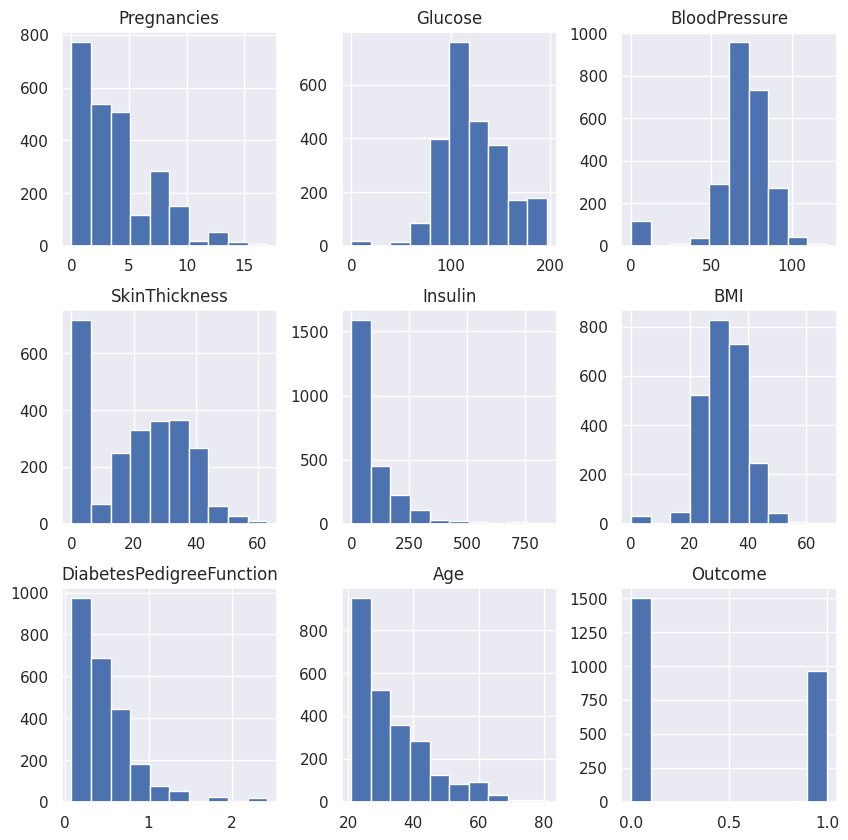

In [ ]:
# doing data visualization
#distribution of attributes
data.hist(bins=10,figsize=(10,10))
plt.show()


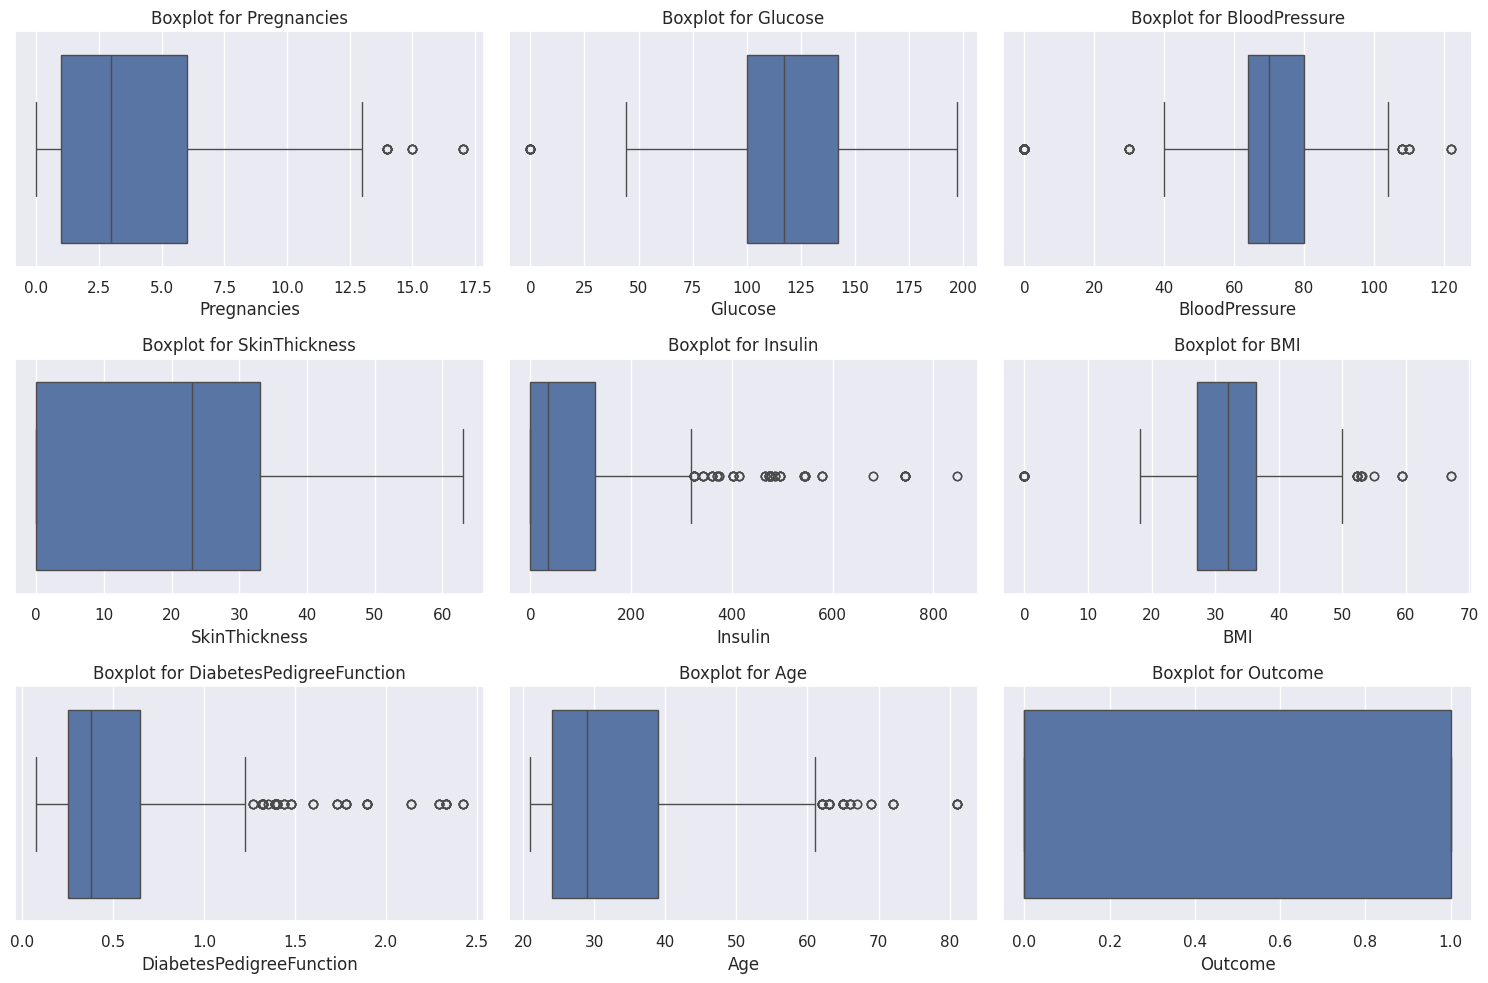

In [ ]:
num_rows, num_cols = 3, 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Loop through numeric columns and create boxplots
for i, column in enumerate(data.columns):
    sns.boxplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

# Remove any remaining empty subplots
for j in range(len(data.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

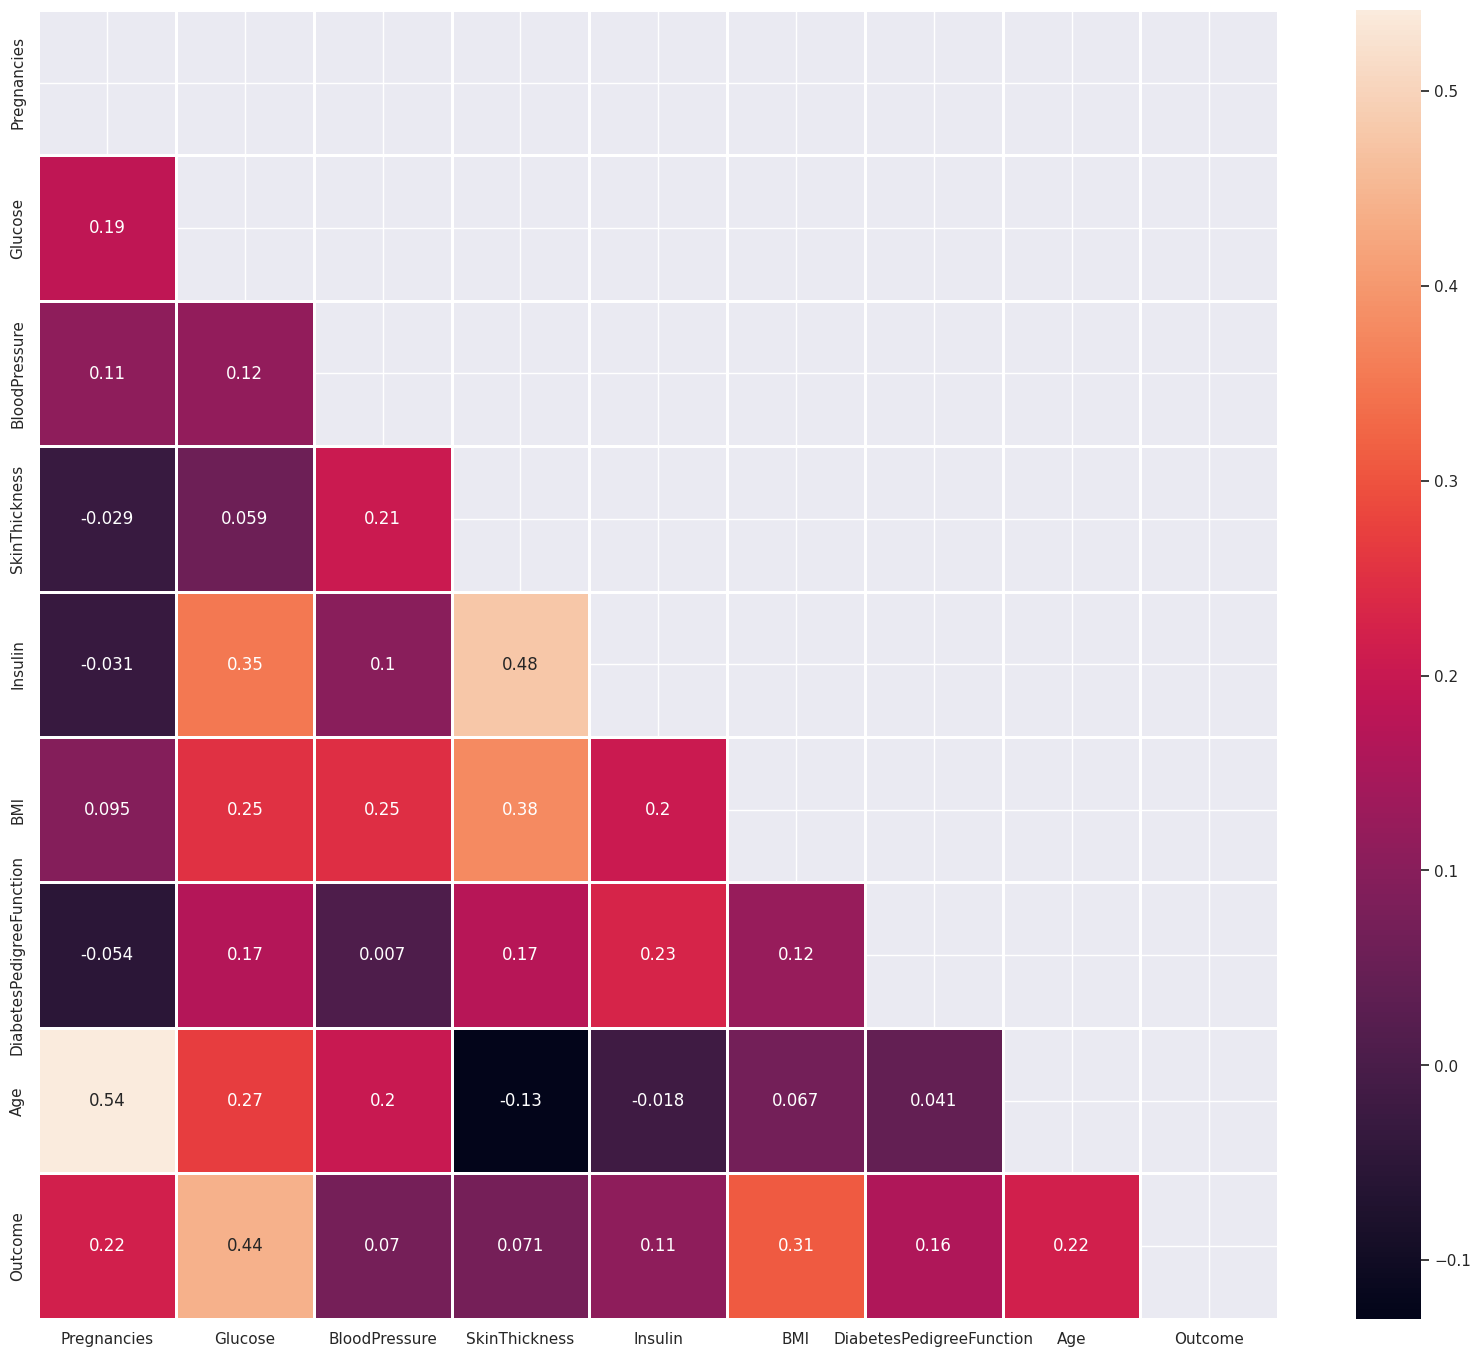

In [ ]:
#heatmap
plt.figure(figsize=(20, 17))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

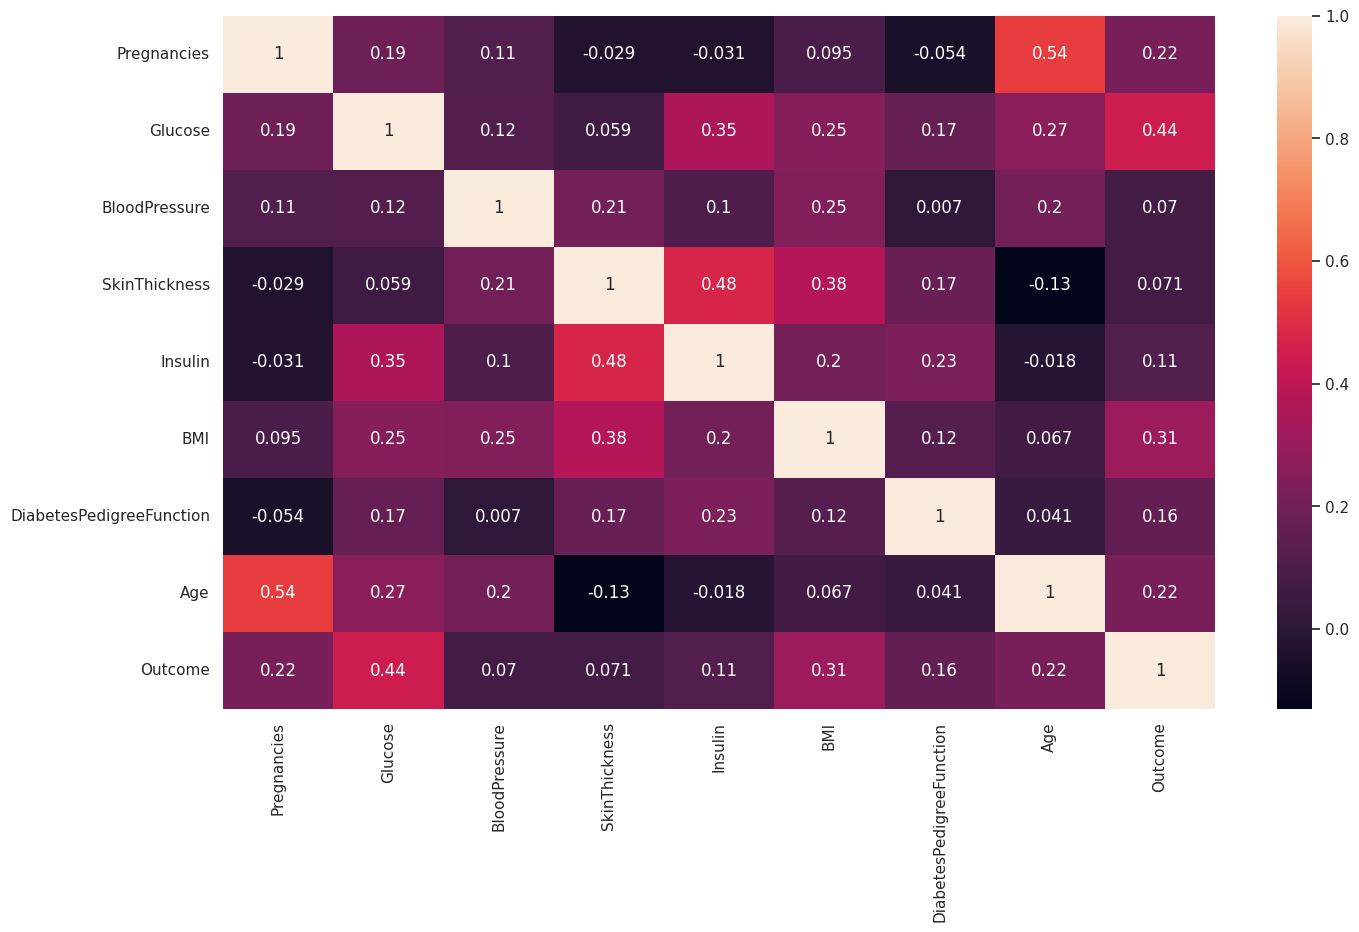

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True);

In [ ]:
data.var()

Pregnancies                    10.866632
Glucose                      1010.557702
BloodPressure                 364.147720
SkinThickness                 247.020980
Insulin                     13634.253609
BMI                            60.880075
DiabetesPedigreeFunction        0.132435
Age                           126.589677
Outcome                         0.238050
dtype: float64

---Q1--- 
 Pregnancies                   1.00000
Glucose                     100.00000
BloodPressure                64.00000
SkinThickness                 0.00000
Insulin                       0.00000
BMI                          27.10000
DiabetesPedigreeFunction      0.25175
Age                          24.00000
Outcome                       0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.000
Glucose                     142.000
BloodPressure                80.000
SkinThickness                33.000
Insulin                     129.000
BMI                          36.500
DiabetesPedigreeFunction      0.647
Age                          39.000
Outcome                       1.000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.00000
Glucose                      42.00000
BloodPressure                16.00000
SkinThickness                33.00000
Insulin                     129.00000
BMI                           9.40000
DiabetesPedigreeF

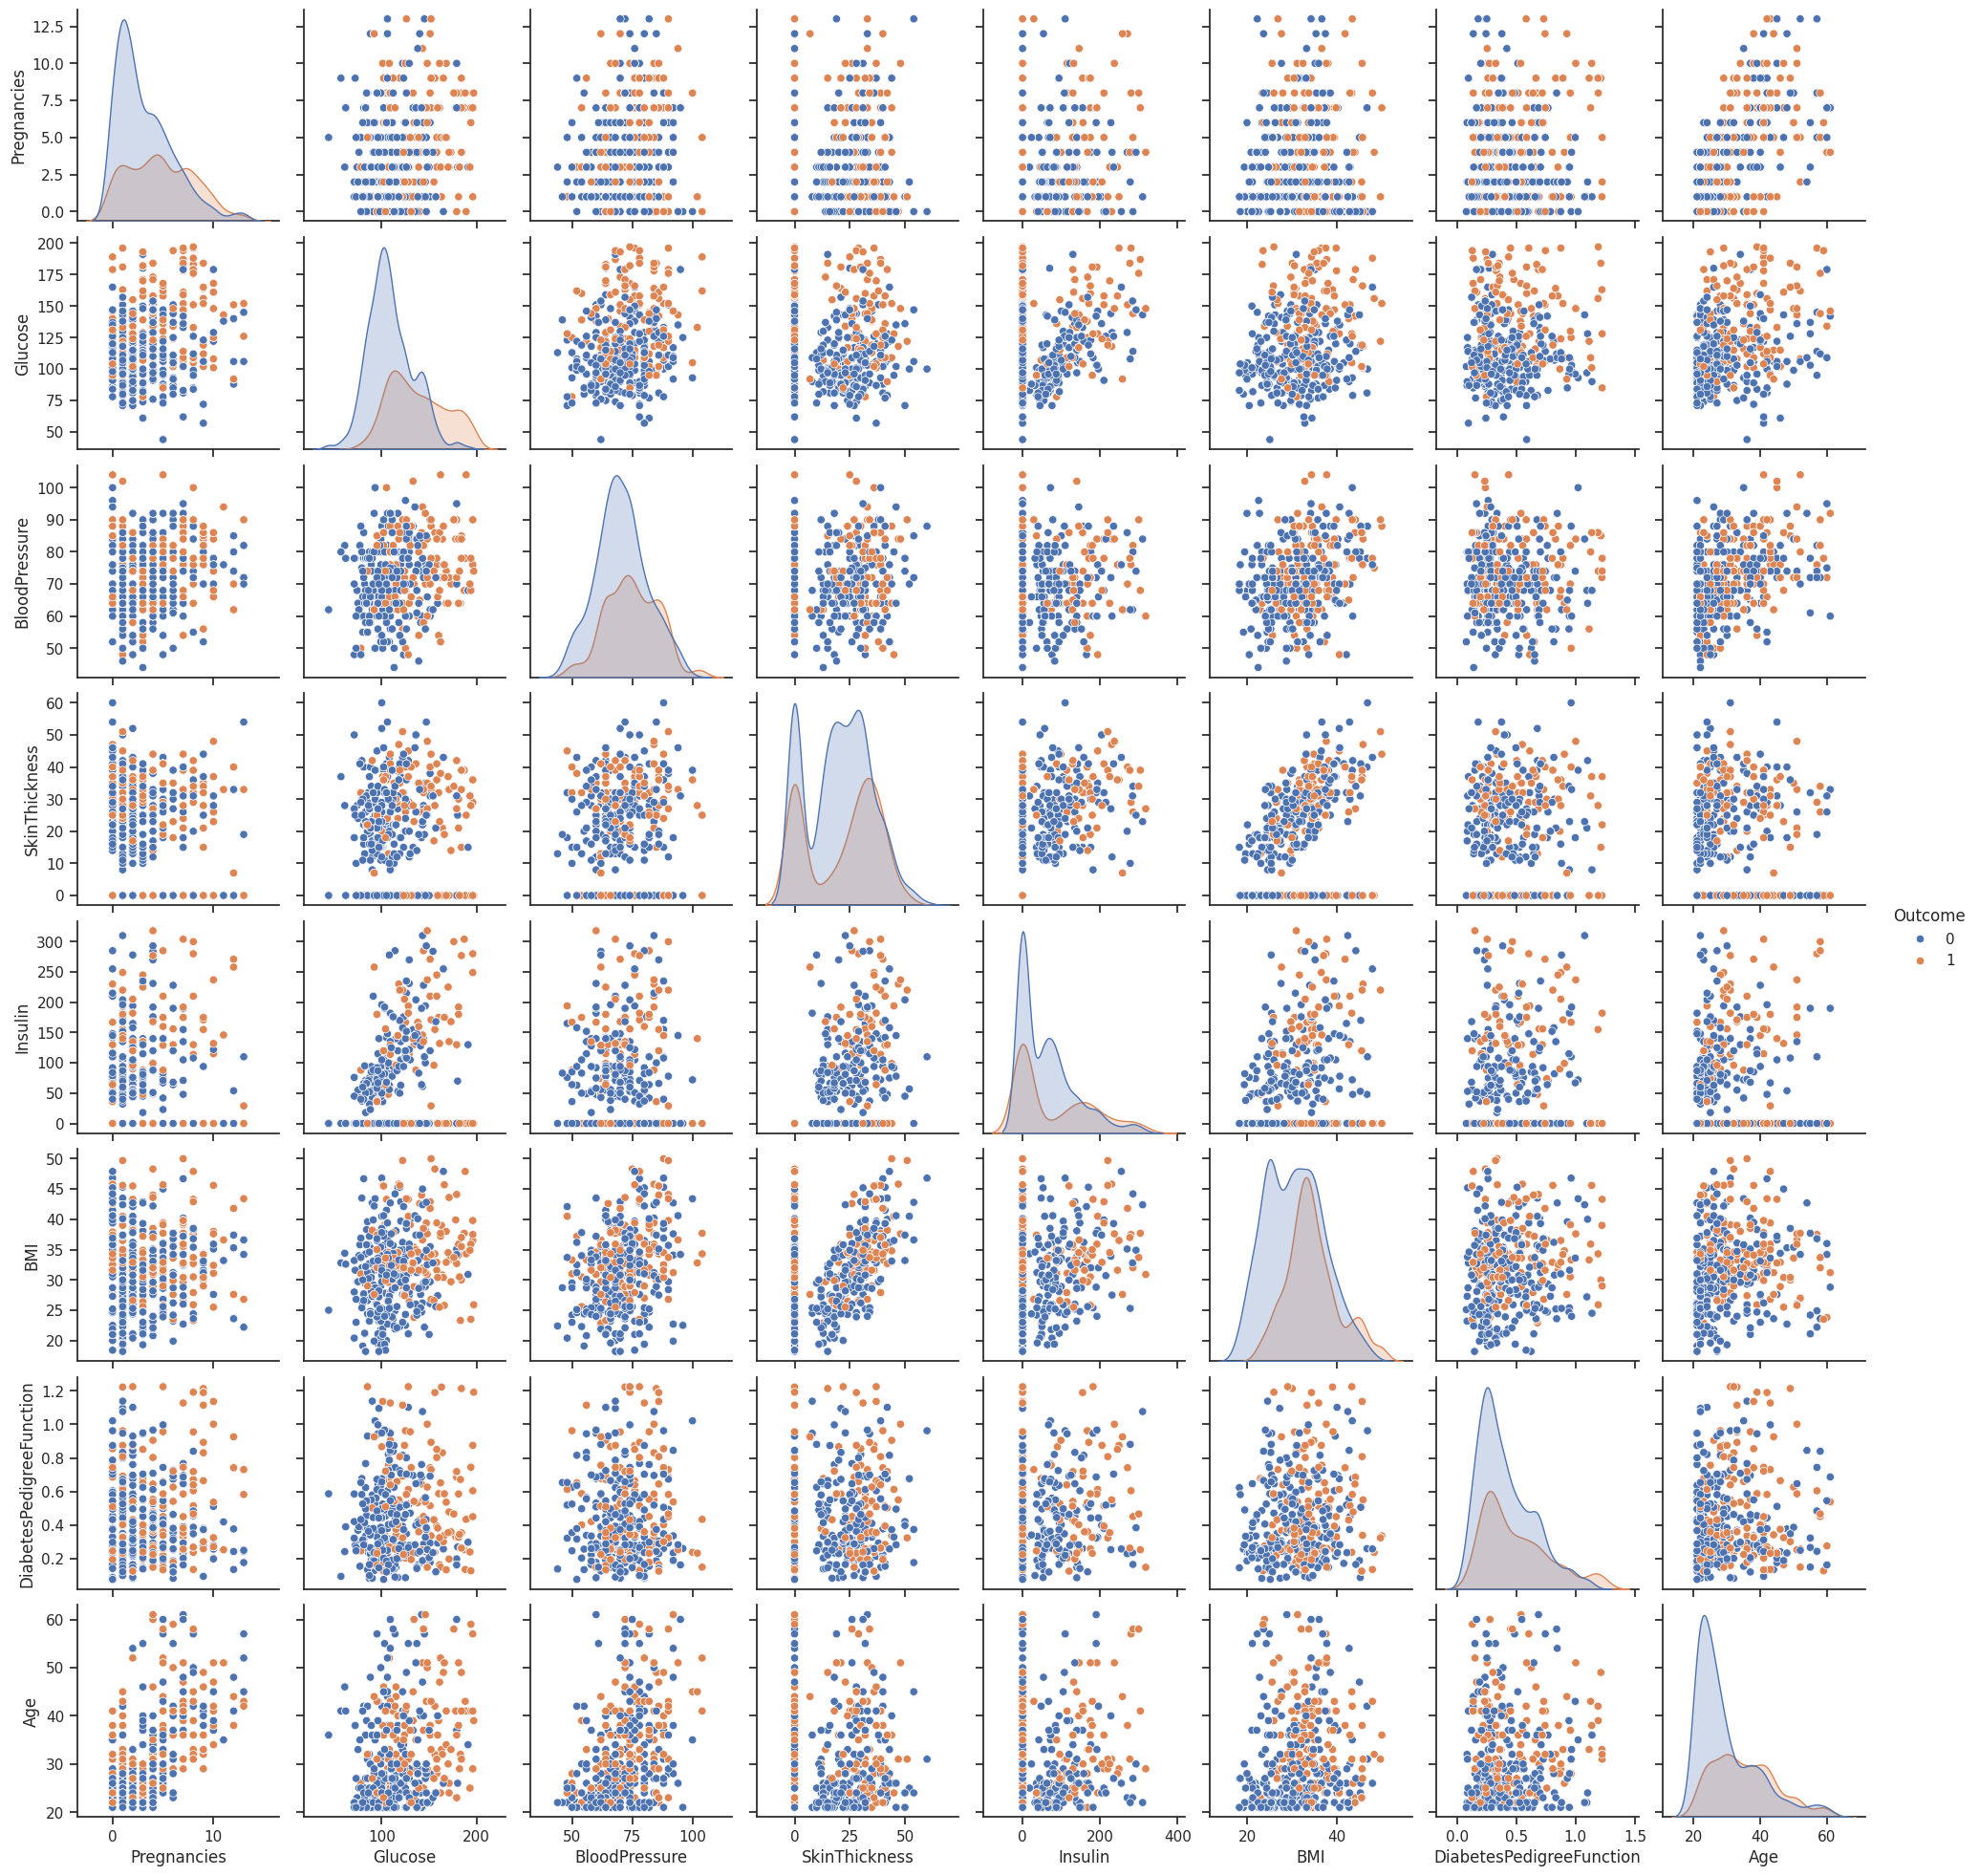

In [ ]:
# quartile ranges and pair plots
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

df_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape,df_out.shape

sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

X=df_out.drop(columns=['Outcome'])
y=df_out['Outcome']


In [ ]:
#traning validation and modeling
X_train_full, X_test, y_train_full, y_test = train_test_split(X, Y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

np.random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(15, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=['accuracy'])
model_history = model.fit(X_train, y_train, epochs=2000, validation_data=(X_valid, y_valid))



Epoch 1/2000
44/44 [==============================] - 2s 15ms/step - loss: 0.6805 - accuracy: 0.6001 - val_loss: 0.6745 - val_accuracy: 0.6104
Epoch 2/2000
44/44 [==============================] - 0s 5ms/step - loss: 0.6659 - accuracy: 0.6211 - val_loss: 0.6606 - val_accuracy: 0.6104
Epoch 3/2000
44/44 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.6471 - val_loss: 0.6480 - val_accuracy: 0.6320
Epoch 4/2000
44/44 [==============================] - 0s 3ms/step - loss: 0.6422 - accuracy: 0.6471 - val_loss: 0.6373 - val_accuracy: 0.6364
Epoch 5/2000
44/44 [==============================] - 0s 4ms/step - loss: 0.6292 - accuracy: 0.6544 - val_loss: 0.6268 - val_accuracy: 0.6515
Epoch 6/2000
44/44 [==============================] - 0s 4ms/step - loss: 0.6223 - accuracy: 0.6580 - val_loss: 0.6167 - val_accuracy: 0.6494
Epoch 7/2000
44/44 [==============================] - 0s 3ms/step - loss: 0.6057 - accuracy: 0.6696 - val_loss: 0.6069 - val_accuracy: 0.6623
Epoch

# New Section

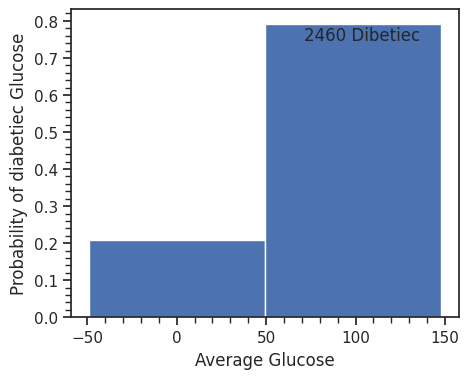

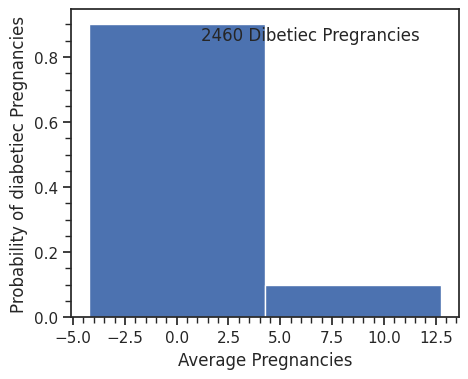

In [ ]:
#probability distribution
import matplotlib.pyplot as plt

data = pd.read_csv("Training.csv", sep=",")
data = data[data.Glucose < 2E4]
H, edges = np.histogram(data.Glucose, bins=2)

plt.figure(figsize=(5, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
ax.text(0.9, 0.9, "%g Dibetiec" % len(data),
        horizontalalignment="right", transform=ax.transAxes)
ax.set_xlabel("Average Glucose")
ax.set_ylabel("Probability of diabetiec Glucose")
ax.minorticks_on()
plt.show()
X = data.iloc[:, :-1]
Y = data.iloc[:,8]

data = data[data.Pregnancies < 2E4]
H, edges = np.histogram(data.Pregnancies, bins=2)

plt.figure(figsize=(5, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
ax.text(0.9, 0.9, "%g Dibetiec Pregrancies" % len(data),
        horizontalalignment="right", transform=ax.transAxes)
ax.set_xlabel("Average Pregnancies")
ax.set_ylabel("Probability of diabetiec Pregnancies")
ax.minorticks_on()
plt.show()
X = data.iloc[:, :-1]
Y = data.iloc[:,8]

In [ ]:
# using logistic regression
X = data.drop('Outcome', axis = 1)
y = data['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=200, solver='liblinear')

Accuracy: 73.58%
Accuracy: 76.83%


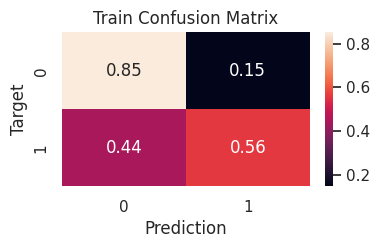

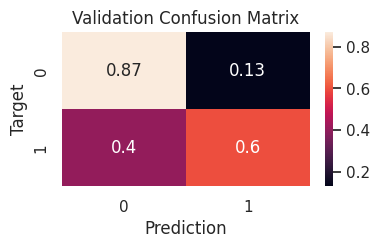

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))

    return preds

# Predict and plot on the training data
train_preds = predict_and_plot(log_reg, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(log_reg, X_test, y_test, 'Validation')